> This's **Kaggle** Notebook; dataset is [here](https://www.kaggle.com/blackmoon/russian-language-toxic-comments).

In [1]:
import os

import numpy as np

# For DataFrame object
import pandas as pd

# Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Text Vectorizing
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Train-test-split
from sklearn.model_selection import train_test_split

# History visualization
%matplotlib inline
import matplotlib.pyplot as plt

# Normalize
from sklearn.preprocessing import normalize

print(os.listdir("../input"))

Using TensorFlow backend.


['labeled.csv']


In [2]:
path = '../input/labeled.csv'
df = pd.read_csv(path)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [3]:
def delete_new_line_symbols(text):
    text = text.replace('\n', ' ')
    return text

In [4]:
df['comment'] = df['comment'].apply(delete_new_line_symbols)
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [5]:
target = np.array(df['toxic'].astype('uint8'))
target[:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [6]:
tokenizer = Tokenizer(num_words=30000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 
                      lower=True, 
                      split=' ', 
                      char_level=False)

In [7]:
tokenizer.fit_on_texts(df['comment'])
matrix = tokenizer.texts_to_matrix(df['comment'], mode='count')
matrix.shape

(14412, 30000)

In [8]:
def get_model():
    
    model = Sequential()
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=RMSprop(lr=0.0001), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [9]:
X = normalize(matrix)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

X_train.shape, y_train.shape

((11529, 30000), (11529,))

In [10]:
model = get_model()

history = model.fit(X_train, 
                    y_train, 
                    epochs=150, 
                    batch_size=500,
                    validation_data=(X_test, y_test))

history

Train on 11529 samples, validate on 2883 samples
Epoch 1/150
11529/11529 [==============================] - 7s 583us/step - loss: 0.6916 - acc: 0.6338 - val_loss: 0.6895 - val_acc: 0.6698
Epoch 2/150
11529/11529 [==============================] - 5s 447us/step - loss: 0.6884 - acc: 0.6641 - val_loss: 0.6860 - val_acc: 0.6698
Epoch 3/150
11529/11529 [==============================] - 5s 445us/step - loss: 0.6851 - acc: 0.6639 - val_loss: 0.6826 - val_acc: 0.6698
Epoch 4/150
11529/11529 [==============================] - 5s 443us/step - loss: 0.6819 - acc: 0.6640 - val_loss: 0.6791 - val_acc: 0.6698
Epoch 5/150
11529/11529 [==============================] - 5s 446us/step - loss: 0.6780 - acc: 0.6640 - val_loss: 0.6751 - val_acc: 0.6698
Epoch 6/150
11529/11529 [==============================] - 5s 444us/step - loss: 0.6736 - acc: 0.6640 - val_loss: 0.6709 - val_acc: 0.6698
Epoch 7/150
11529/11529 [==============================] - 5s 445us/step - loss: 0.6699 - acc: 0.6640 - val_loss: 0.6

11529/11529 [==============================] - 5s 435us/step - loss: 0.3048 - acc: 0.9037 - val_loss: 0.3683 - val_acc: 0.8515
Epoch 60/150
11529/11529 [==============================] - 5s 436us/step - loss: 0.2974 - acc: 0.9075 - val_loss: 0.3651 - val_acc: 0.8526
Epoch 61/150
11529/11529 [==============================] - 5s 437us/step - loss: 0.2932 - acc: 0.9055 - val_loss: 0.3631 - val_acc: 0.8529
Epoch 62/150
11529/11529 [==============================] - 5s 436us/step - loss: 0.2863 - acc: 0.9088 - val_loss: 0.3600 - val_acc: 0.8547
Epoch 63/150
11529/11529 [==============================] - 5s 437us/step - loss: 0.2815 - acc: 0.9122 - val_loss: 0.3576 - val_acc: 0.8557
Epoch 64/150
11529/11529 [==============================] - 5s 438us/step - loss: 0.2758 - acc: 0.9132 - val_loss: 0.3535 - val_acc: 0.8578
Epoch 65/150
11529/11529 [==============================] - 5s 436us/step - loss: 0.2706 - acc: 0.9178 - val_loss: 0.3524 - val_acc: 0.8581
Epoch 66/150
11529/11529 [=======

11529/11529 [==============================] - 5s 438us/step - loss: 0.1018 - acc: 0.9719 - val_loss: 0.3814 - val_acc: 0.8727
Epoch 118/150
11529/11529 [==============================] - 5s 434us/step - loss: 0.1002 - acc: 0.9727 - val_loss: 0.3879 - val_acc: 0.8717
Epoch 119/150
11529/11529 [==============================] - 5s 434us/step - loss: 0.0957 - acc: 0.9729 - val_loss: 0.3935 - val_acc: 0.8730
Epoch 120/150
11529/11529 [==============================] - 5s 436us/step - loss: 0.0949 - acc: 0.9739 - val_loss: 0.3969 - val_acc: 0.8741
Epoch 121/150
11529/11529 [==============================] - 5s 435us/step - loss: 0.0900 - acc: 0.9755 - val_loss: 0.3947 - val_acc: 0.8724
Epoch 122/150
11529/11529 [==============================] - 5s 435us/step - loss: 0.0936 - acc: 0.9752 - val_loss: 0.3989 - val_acc: 0.8734
Epoch 123/150
11529/11529 [==============================] - 5s 434us/step - loss: 0.0886 - acc: 0.9738 - val_loss: 0.4010 - val_acc: 0.8734
Epoch 124/150
11529/11529 [

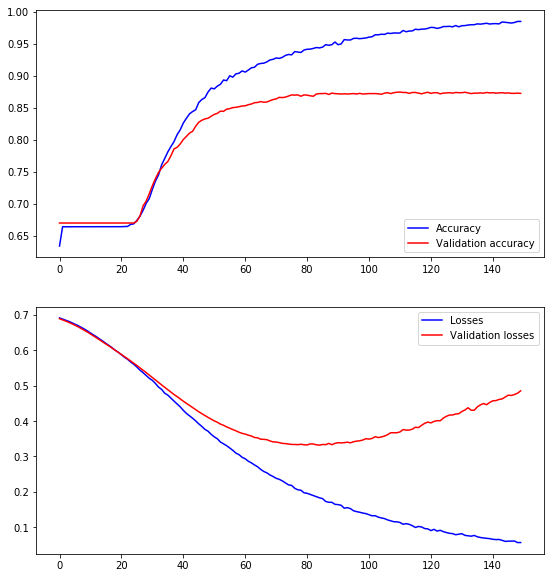

In [11]:
history = history.history

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)

x = range(150)

ax1.plot(x, history['acc'], 'b-', label='Accuracy')
ax1.plot(x, history['val_acc'], 'r-', label='Validation accuracy')
ax1.legend(loc='lower right')

ax2.plot(x, history['loss'], 'b-', label='Losses')
ax2.plot(x, history['val_loss'], 'r-', label='Validation losses')
ax2.legend(loc='upper right')